# Machine Learning Experiment with Exercises

This notebook extends the basic ML refresher by adding exercises for you to complete. The initial part reviews loading data, training a model, and evaluating it. Below, you'll find template code and **TODO** markers for each exercise.

## Review: Basic Logistic Regression on Iris Dataset

In [ ]:
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

Accuracy: 1.00


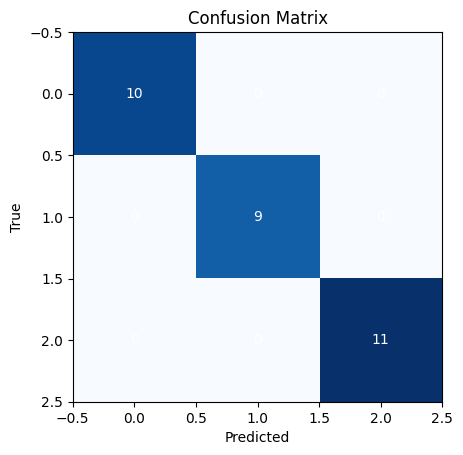

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Exercises

Complete the following exercises by filling in the `# TODO` sections. Run each cell to test your implementation.


### Exercise 1: Classification Report & Metrics
**Goal**: Generate a classification report including precision, recall, and F1-score.

**Instructions**:
1. Use `sklearn.metrics.classification_report` on the test set.
2. Display the report as a dictionary or a pandas DataFrame.

In [2]:
from sklearn.metrics import classification_report

# TODO: Generate classification report
target_names = data.target_names
report = classification_report(y_test, preds, target_names=target_names, output_dict=True)

# TODO: Convert to DataFrame and display
report_df = pd.DataFrame(report).T
print(report_df)

              precision  recall  f1-score  support
setosa              1.0     1.0       1.0     10.0
versicolor          1.0     1.0       1.0      9.0
virginica           1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


### Exercise 2: Cross-Validation with SVC
**Goal**: Evaluate an SVM classifier using 5-fold cross-validation.

**Instructions**:
1. Import `sklearn.svm.SVC` and `sklearn.model_selection.cross_val_score`.
2. Create an `SVC` model with `kernel='rbf'`.
3. Perform 5-fold CV on the entire dataset `X, y`.
4. Print the mean and standard deviation of the accuracy scores.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# TODO: Initialize SVC model
svm_model = SVC(kernel='rbf', C=1.0)

# TODO: Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# TODO: Display results
print(f"CV Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

CV Accuracy: 0.97 ± 0.02


### Exercise 3: Hyperparameter Tuning with GridSearchCV
**Goal**: Use grid search to find the best hyperparameters for a Random Forest classifier.

**Instructions**:
1. Import `RandomForestClassifier` and `GridSearchCV`.
2. Define a parameter grid for `n_estimators` (e.g., [50, 100]) and `max_depth` (e.g., [None, 5, 10]).
3. Use 3-fold CV within `GridSearchCV`.
4. Fit on the training data, and print the best params and best score.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# TODO: Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

# TODO: Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')

# TODO: Fit on training data
grid_search.fit(X_train, y_train)

# TODO: Print best parameters and score
print("Best Params:", grid_search.best_params_)
print(f"Best CV Score: {grid_search.best_score_:.2f}")

Best Params: {'max_depth': None, 'n_estimators': 50}
Best CV Score: 0.96


### Exercise 4: ROC Curve for One-vs-Rest
**Goal**: Plot ROC curves for each class using a One-vs-Rest strategy.

**Instructions**:
1. Import `OneVsRestClassifier`, `roc_curve`, and `auc`.
2. Binarize the target labels.
3. Fit a logistic regression within `OneVsRestClassifier`.
4. Compute ROC curve and AUC for each class and plot all curves.

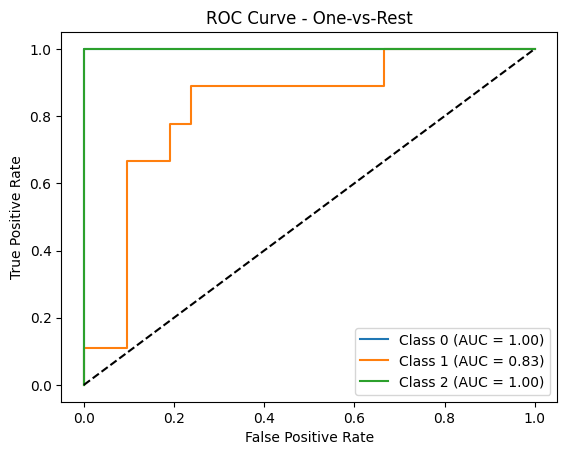

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# TODO: Binarize labels
Y = label_binarize(y, classes=[0,1,2])
X_train_bin, X_test_bin, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TODO: Initialize OneVsRestClassifier with LogisticRegression
ovr = OneVsRestClassifier(LogisticRegression(max_iter=200))

# TODO: Fit model
over_model = ovr.fit(X_train_bin, Y_train)

# TODO: Compute probabilities and ROC/AUC for each class
probs = over_model.predict_proba(X_test_bin)
import matplotlib.pyplot as plt
for i in range(Y.shape[1]):
    fpr, tpr, _ = roc_curve(Y_test[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest')
plt.legend()
plt.show()

---

Once you've completed these exercises, you will have practiced key ML workflow tasks: generating detailed metrics, performing cross-validation, tuning hyperparameters, and plotting ROC curves. Feel free to explore additional models and metrics to deepen your understanding!